In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Training dataset path
train_path = "/content/drive/MyDrive/MLIndiaAI/TRAIN.csv"

In [3]:
# reading in the dataset
train_dt = pd.read_csv(train_path, index_col='Index')

In [4]:
train_dt.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
284450,1.216221,0.095995,0.666817,1.850616,-0.516269,-0.267296,-0.183114,-0.104976,-1.985790,1.442988,-0.153159,0.143619,0.923098,0.095348,0.439161,-1.330980,0.021354,0.416465,-2.256853,-0.528517,-0.286826,-0.347838,0.072935,0.367923,0.358108,0.044019,0.027223,0.028017,19.46,0
284451,1.429502,-0.990271,-0.224429,-1.808740,0.770788,3.730989,-1.914212,1.036385,-0.316971,0.646103,-0.100190,-0.751095,0.437456,-0.504131,1.491844,2.024039,-0.554936,-0.204874,0.477147,0.206332,0.376136,0.928723,-0.108174,1.048922,0.481214,-0.026342,0.062900,0.024639,0.02,0
284452,2.041198,-0.218276,-1.405547,0.187570,0.001916,-0.781668,-0.043787,-0.090115,0.677407,0.227002,0.439484,-0.085891,-1.801888,1.007830,0.348531,0.140724,-0.729001,0.717937,0.099021,-0.348353,0.273900,0.844092,-0.023770,-0.407890,0.190140,-0.089576,-0.029237,-0.075626,1.00,0
284453,1.857451,0.071823,-0.086963,3.553877,0.082026,1.245277,-0.788886,0.467363,-0.271086,1.574760,-0.443961,-0.501712,-1.357095,0.173390,-1.039803,1.643621,-1.299847,0.922837,-1.231397,-0.306389,0.170106,0.451313,0.157898,0.129330,-0.228721,0.012281,-0.003598,-0.041590,11.31,0
284454,-0.684651,1.031745,0.693707,0.966796,0.297916,1.261476,-0.125550,0.887185,-0.256040,-0.156763,-0.526146,0.138975,-0.801623,0.445057,-0.456851,-0.446537,0.121772,0.532317,1.476535,0.027695,0.042087,0.333864,-0.259636,-1.304181,-0.035003,-0.099278,0.318439,0.128356,14.95,0


In [5]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284455 entries, 0 to 284454
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284455 non-null  float64
 1   V2      284455 non-null  float64
 2   V3      284455 non-null  float64
 3   V4      284455 non-null  float64
 4   V5      284455 non-null  float64
 5   V6      284455 non-null  float64
 6   V7      284455 non-null  float64
 7   V8      284455 non-null  float64
 8   V9      284455 non-null  float64
 9   V10     284455 non-null  float64
 10  V11     284455 non-null  float64
 11  V12     284455 non-null  float64
 12  V13     284455 non-null  float64
 13  V14     284455 non-null  float64
 14  V15     284455 non-null  float64
 15  V16     284455 non-null  float64
 16  V17     284455 non-null  float64
 17  V18     284455 non-null  float64
 18  V19     284455 non-null  float64
 19  V20     284455 non-null  float64
 20  V21     284455 non-null  float64
 21  V22     28

In [6]:
# Checking the target variable to check how imbalanced the dataset is
train_dt['Class'].value_counts()

0    284015
1       440
Name: Class, dtype: int64

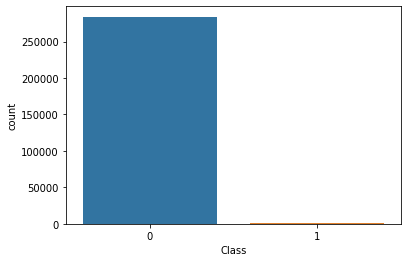

In [7]:
sns.countplot(x=train_dt['Class'], data=train_dt)

In [8]:
# fraud = train_dt[train_dt['Class']==1]
# fraud

In [9]:
# Checking correlation of each feature with respect to the target variable
train_dt.corrwith(train_dt['Class']).sort_values(ascending=True)

V17      -0.312714
V14      -0.287015
V12      -0.249538
V10      -0.207321
V16      -0.186621
V3       -0.183220
V7       -0.180110
V18      -0.105902
V1       -0.096373
V9       -0.093588
V5       -0.089295
V6       -0.041521
V24      -0.006572
V13      -0.004318
V15      -0.003658
V23      -0.002535
V25       0.001242
V22       0.002137
V26       0.004224
Amount    0.004730
V28       0.008279
V8        0.015590
V27       0.015708
V20       0.019624
V19       0.032968
V21       0.035185
V2        0.086505
V4        0.127422
V11       0.147121
Class     1.000000
dtype: float64

In [10]:
# shuffle the dataset
from sklearn.utils import shuffle
train_dt = shuffle(train_dt)
train_dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
277078,1.447339,-0.424178,-0.340811,-0.848352,-0.169198,-0.049144,-0.266495,-0.146618,-1.167442,0.757756,0.129746,0.935826,1.521616,-0.102467,-0.796737,-1.320017,-0.431840,1.316452,0.257675,-0.373594,-0.460368,-0.685025,-0.176259,-0.756705,0.601642,1.142946,-0.065722,-0.021540,6.00,0
86967,1.277719,0.238629,0.150937,0.366142,0.186172,-0.024307,0.019426,-0.058278,-0.021364,-0.131688,-0.609022,0.599977,1.235809,0.059261,1.257916,0.217517,-0.494766,-0.815258,-0.166542,-0.048022,-0.276111,-0.719127,0.053281,-0.750068,0.283550,0.173676,-0.008388,0.008723,1.29,0
121321,1.898960,-1.424832,-0.655962,-0.828854,-1.133514,-0.266519,-0.965984,-0.057325,0.083597,0.686924,-0.735441,-0.498779,0.493885,-0.484497,0.672066,1.373560,-0.013665,-0.979429,0.193720,0.293841,0.479346,1.097607,0.047397,0.721292,-0.236904,-0.108815,-0.010836,-0.014209,150.00,0
209757,-2.264542,0.876229,2.767078,0.453284,-1.283922,1.408006,-0.561759,0.296034,1.187896,3.044434,0.781572,0.913489,0.064948,-1.980338,-1.691185,-3.042203,0.828920,1.077356,0.301684,0.712901,-0.744808,-0.142435,-0.205559,0.215991,0.491636,-0.103396,0.808615,0.328638,20.00,0
267131,-0.246432,1.205052,0.742941,-0.280321,0.864537,-0.150148,0.785650,-0.075361,-0.545013,-0.556227,-1.185542,0.326095,1.992239,-0.837147,0.817706,0.713963,-0.593244,0.118152,0.425612,0.264682,-0.336647,-0.814000,-0.206890,-1.023491,0.081488,0.153241,0.254322,0.087728,2.78,0


In [11]:
# Splitting the dataset
X = train_dt.drop(['Class'], axis=1)
y = train_dt['Class']

In [12]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [13]:
X

array([[9.82882270e-01, 7.62782665e-01, 8.31507857e-01, ...,
        4.15297881e-01, 3.12686754e-01, 2.33543367e-04],
       [9.80000649e-01, 7.69776251e-01, 8.40029146e-01, ...,
        4.16356130e-01, 3.13300890e-01, 5.02118238e-05],
       [9.90554765e-01, 7.52224290e-01, 8.26046743e-01, ...,
        4.16310942e-01, 3.12835521e-01, 5.83858417e-03],
       ...,
       [9.94108080e-01, 7.57603004e-01, 8.09581702e-01, ...,
        4.15537535e-01, 3.11890649e-01, 2.71688783e-03],
       [9.59931571e-01, 7.74574840e-01, 8.08209905e-01, ...,
        4.21002573e-01, 3.14581392e-01, 2.33154128e-04],
       [9.92038875e-01, 7.68118676e-01, 8.04869464e-01, ...,
        4.15686454e-01, 3.12799394e-01, 1.48883896e-03]])

In [14]:
# Using SMOTE reseampling method to balance the dataset
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 284015), (1, 284015)]


In [16]:
# importing potential algorithms to fit the data with 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [17]:
# Cross validate the dataset to prevent overfitting and select the best algorithm
from sklearn.model_selection import cross_val_score

In [18]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc_scores=cross_val_score(rfc, X_resampled, y_resampled, cv=10, scoring='accuracy')
print(rfc_scores)
print(rfc_scores.mean())

[0.99987677 0.99985916 0.99992958 0.99987677 0.99991198 0.99991198
 0.99991198 0.99987677 0.99991198 0.9999824 ]
0.9999049345985247


In [19]:
xgb = XGBClassifier()
xgb_scores=cross_val_score(xgb, X_resampled, y_resampled, cv=10, scoring='accuracy')
print(xgb_scores)
print(xgb_scores.mean())

[0.98082848 0.98156787 0.98075806 0.98084608 0.98051159 0.98285302
 0.98385649 0.98183195 0.98030034 0.98193757]
0.9815291445874337


In [23]:
svc = LinearSVC()
svc_scores=cross_val_score(svc, X_resampled, y_resampled, cv=10, scoring='accuracy')
print(svc_scores)
print(svc_scores.mean())

[0.94627044 0.94658733 0.94700984 0.94803091 0.94600637 0.94841822
 0.9476084  0.94887594 0.94533739 0.94718589]
0.9471330739573615


In [24]:
knn = KNeighborsClassifier()
knn_scores=cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
print(knn_scores)
print(knn_scores.mean())

[0.99931342 0.99931342 0.99933102 0.99922539 0.99927821 0.99936623
 0.99929581 0.99929581 0.99936623 0.99934863]
0.9993134165449009


Train The Best Model

In [27]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
# Test data path
test_path = "/content/drive/MyDrive/MLIndiaAI/TEST.csv"

In [44]:
# Reading in the test dataset
test_dt = pd.read_csv(test_path, index_col='Index')
test_dt.index
# scaling the test dataset
x_test = scaler.transform(test_dt)

In [45]:
# Making predictions from the trained model
y_pred = rfc.predict(x_test)

In [47]:
# Final Result
result = pd.DataFrame({"Index":test_dt.index, 'Class':y_pred})
result

,Index,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
347,347,1
348,348,0
349,349,0
350,350,0


In [49]:
result['Class'].value_counts()

0    309
1     43
Name: Class, dtype: int64

In [50]:
result.to_csv('/content/drive/MyDrive/MLIndiaAI/result.csv',index=False)